# **Introduction**

The 21st century has seen a boom in the startup culture, where innovative individuals have entered the market and reprensted entrepreneurial success and transforming industries. This project delves into a comprehensive dataset of unicorn companies, aiming to put light on the key trends, patterns, and insights that define this ecosystem.
The visulasised data of this dataset will help investorss and stake holders leverage this knowledge to identify promising sectors and insvestment opportunities.

# **Target Audiance:**

This report target orianted towards investorss and stake holders

# **Data Overview:**
The Dataset choosen for this project includes the data of top unicorn firms around the world, the data includes unicorns(companies with 1 billion dollor evaluation) from various industries and countries.

# **Objective:**
the main aim of this project is to identify the answer to the following three research questions;
1. Does geographical location of a unicorn have a significance impact on its valuation?

2. Are there any emerging industries witha higher concentration of new new unicorn companies?



In [ ]:
import plotly.io as pio
pio.renderers.default='notebook'

In [ ]:
#Libraries Installation
!pip install numpy
!pip install scipy
!pip install matplotlib
!pip install plotly

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
import warnings
import io
from math import ceil
from sklearn.preprocessing import LabelEncoder

url = 'https://raw.githubusercontent.com/Rakshit10Verma/DV-B108/main/List%20of%20Unicorns%20in%20the%20World.csv' #URL Path
df = pd.read_csv(url) #To access the url retrived file


In [ ]:
df.head(4) #To show first 10 rows of the dataset

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry
0,0,ByteDance,$225,4/7/2017,China,Beijing,Media & Entertainment
1,1,SpaceX,$150,12/1/2012,United States,Hawthorne,Industrials
2,2,OpenAI,$80,7/22/2019,United States,San Francisco,Enterprise Tech
3,3,SHEIN,$66,7/3/2018,Singapore,Singapore City,Consumer & Retail


# **Data Cleaning**

In [ ]:
df.info() #To retrive information and get a brief overview of the Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      1233 non-null   int64 
 1   Company         1233 non-null   object
 2   Valuation ($B)  1233 non-null   object
 3   Date Joined     1233 non-null   object
 4   Country         1233 non-null   object
 5   City            1233 non-null   object
 6   Industry        1233 non-null   object
dtypes: int64(1), object(6)
memory usage: 67.6+ KB


In [ ]:
df.isnull().sum() #To check null values

Unnamed: 0        0
Company           0
Valuation ($B)    0
Date Joined       0
Country           0
City              0
Industry          0
dtype: int64

In [ ]:
df.duplicated().sum() #Checking Redundancy

0

In [ ]:
df['year']=pd.DatetimeIndex(df['Date Joined']).year

In [ ]:
df.sample(4) #Showing some random data after extracting the year form the dates

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,year
116,116,RELEX,$5.70,2/17/2022,Finland,Helsinki,Consumer & Retail,2022
674,674,Arcadia,$1.48,5/10/2022,United States,DC,Enterprise Tech,2022
707,707,Away,$1.40,5/15/2019,United States,New York,Consumer & Retail,2019
531,531,Slice,$1.80,11/28/2021,India,Bengaluru,Financial Services,2021


In [ ]:
df = df.rename(columns={'Company':'Company Name','Valuation ($B)':'Valuation','Date Joined':'Join Date'})

In [ ]:
df.sample(4) #To se that the coloumn nams are changed or not

,Unnamed: 0,Company Name,Valuation,Join Date,Country,City,Industry,year
296,296,Groww,$3,4/7/2021,India,Bengaluru,Financial Services,2021
116,116,RELEX,$5.70,2/17/2022,Finland,Helsinki,Consumer & Retail,2022
727,727,Tripledot,$1.40,2/14/2022,United Kingdom,London,Media & Entertainment,2022
36,36,Global Switch,$11.10,12/22/2016,United Kingdom,London,Enterprise Tech,2016


In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
df.sample(4)

,Company Name,Valuation,Join Date,Country,City,Industry,year
732,Patreon,$1.35,9/2/2020,United States,San Francisco,Media & Entertainment,2020
1101,Simply,$1,6/21/2021,Israel,Tel Aviv,Media & Entertainment,2021
179,Globalization Partners,$4.20,1/24/2022,United States,Boston,Enterprise Tech,2022
579,SafetyCulture,$1.76,5/3/2021,Australia,Sydney,Industrials,2021


# **Visualisation**

In [ ]:
#Converting Coloumn values of 'Valuation' in Float Data type

df['Valuation_f'] = df['Valuation'].str.replace('$', '').astype(float)
df.head()

,Company Name,Valuation,Join Date,Country,City,Industry,year,Valuation_f
0,ByteDance,$225,4/7/2017,China,Beijing,Media & Entertainment,2017,225.0
1,SpaceX,$150,12/1/2012,United States,Hawthorne,Industrials,2012,150.0
2,OpenAI,$80,7/22/2019,United States,San Francisco,Enterprise Tech,2019,80.0
3,SHEIN,$66,7/3/2018,Singapore,Singapore City,Consumer & Retail,2018,66.0
4,Stripe,$65,1/23/2014,United States,San Francisco,Financial Services,2014,65.0


In [ ]:
#1 Creaing a distribution based on top 30 companies based on valuation

top30 = df.groupby('Company Name')['Valuation'].sum().sort_values(ascending = False).head(30)
top30

Company Name
ServiceTitan    $9.50
HEYTEA          $9.28
N26             $9.23
Navan           $9.20
VAST Data        $9.1
Northvolt       $9.08
Niantic            $9
Tanium             $9
OYO Rooms          $9
OpenAI            $80
Getir           $8.80
Rapyd           $8.75
Kavak           $8.70
Nuro            $8.60
Chainalysis     $8.60
Pony.ai         $8.60
SumUp           $8.50
Personio        $8.50
Anduril         $8.48
Lacework        $8.30
Tipalti         $8.30
Tempus          $8.10
Dream11            $8
Flexport           $8
FalconX            $8
Fireblocks         $8
StarkWare          $8
Swiggy             $8
Caris           $7.83
Dapper Labs     $7.60
Name: Valuation, dtype: object

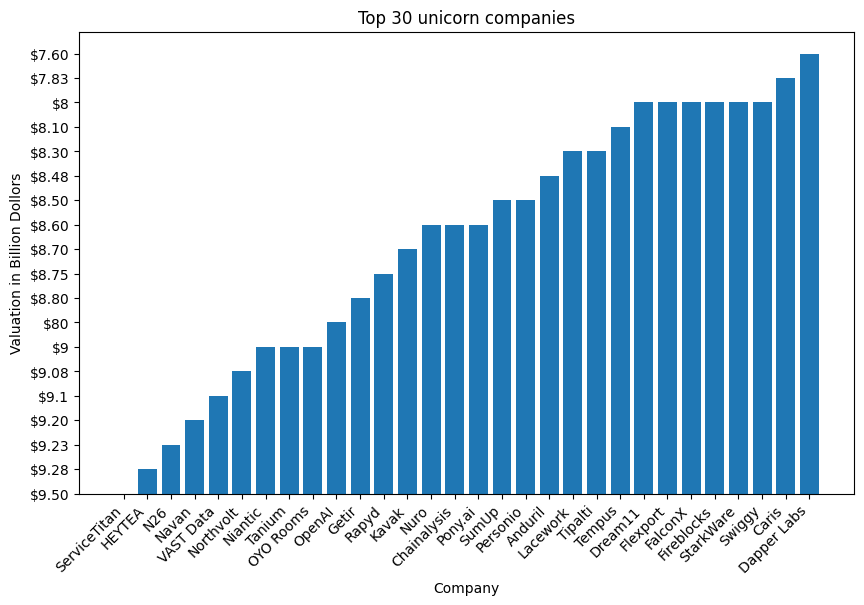

In [ ]:
#visualising the above data

fig, ax = plt.subplots(figsize = (10,6))
plt.bar(top30.index, top30.values)
plt.xlabel('Company')
plt.ylabel('Valuation in Billion Dollors')
plt.xticks(rotation = 45, ha = 'right')
plt.title('Top 30 unicorn companies')
plt.show()

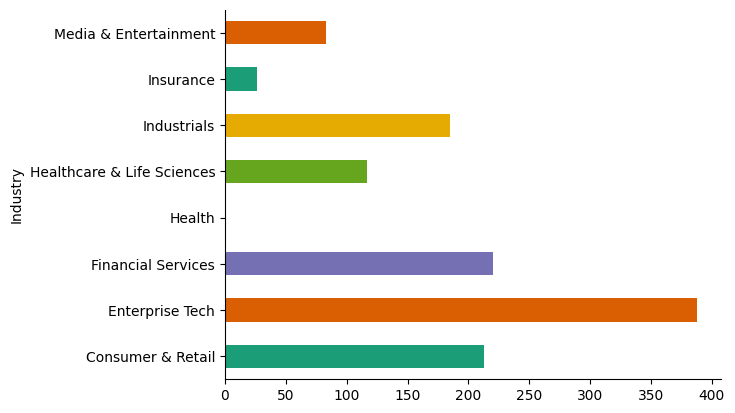

In [ ]:
#2 Distribution based on the industies, the unicorns are featured in

df.groupby('Industry').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#3 Number of Companies in Top 5 Countries

# the following code Counts the number of companies in each country and returns the top 5
top_c = df['Country'].value_counts().nlargest(5)

# This Creates a dataframe for the counts
df_top_c = pd.DataFrame({'Country': top_c.index, 'Count': top_c.values})

# the following code visualises the Data in the form of an pie chart
fig3 = px.pie(df_top_c, names='Country', values='Count', title='Number of Companies in Top 5 Countries')
fig3.show()

In [ ]:
#4 the following data visulaised depicts the data based on their join dtae and valuation
from plotly import express

warnings.filterwarnings(action='ignore',category=FutureWarning)
express.strip(data_frame=df, x='Join Date',y ='Valuation', color='Country',log_y = True, height=1500, hover_name='Company Name' )

In [ ]:
# to show the high and low values Valuations by Industry with the Box Plot

# Create a box plot showing the distribution of valuations across different industries
fig5 = px.box(df, x='Industry', y='Valuation', title='Valuations by Industry')

# Display the plot
fig5.show()

Key Insights:

*   The geographical location of the company has had a major impact on its valuation, as majority of the companies (more than 50%) are from united states and China. which makes them a center of intrest for the investers and stake holders.

*   The industry with hisghest number of unicorns is the industry of Enterprise Tech. This is an indication for the investors that this intustry is on boom and will witness more sucess in the coming future. this makes it the most prosperous industry.

**Data set Representation:**

Source: https://www.cbinsights.com/research-unicorn-companies

In [ ]:
!jupyter nbconvert --to html B106_Data_Visulation.ipynb

[NbConvertApp] Converting notebook B106_Data_Visulation.ipynb to html
[NbConvertApp] Writing 915278 bytes to B106_Data_Visulation.html
